# HR Analytics Project- Understanding the Attrition in HR 
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing Dataset

In [205]:
hr_data=pd.read_csv('/content/Hr_analytics.csv')
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Understanding the data

In [206]:
# Description of data_set
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [207]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Exploratory Data Analysis

In [208]:
#Checking shape of dataset
hr_data.shape

(1470, 35)

In [209]:
# checking for duplicate values
hr_data.duplicated().sum()

0

In [210]:
#Checking for null values 
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Data Visualization

## Univariate Analysis(for every column)

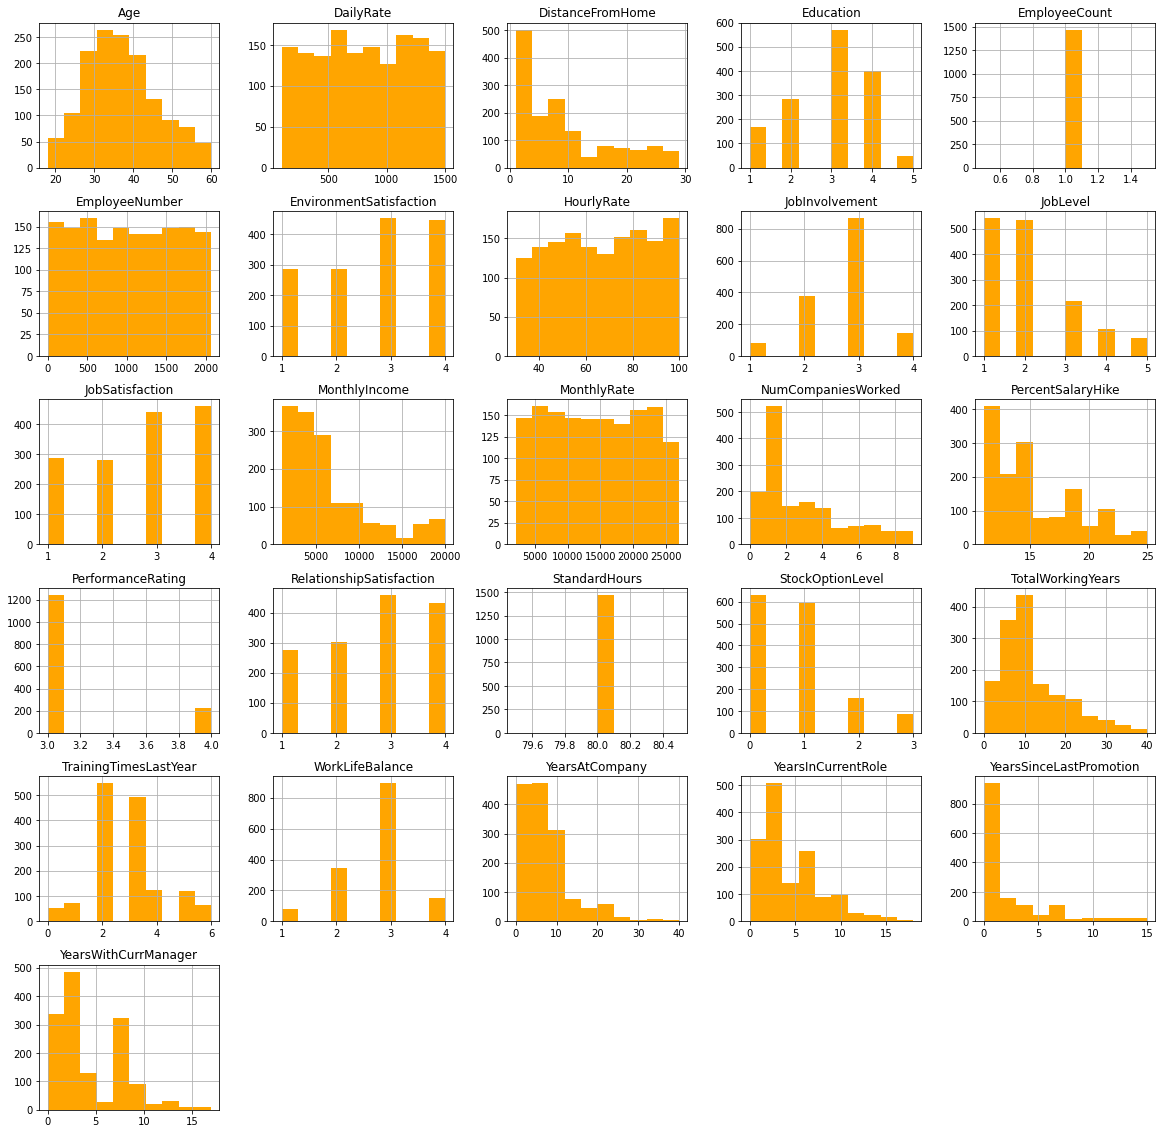

In [211]:
## plot histogram for numeric columns
hr_data.hist(figsize=(20,20),color= 'orange')
plt.show()

Box plot

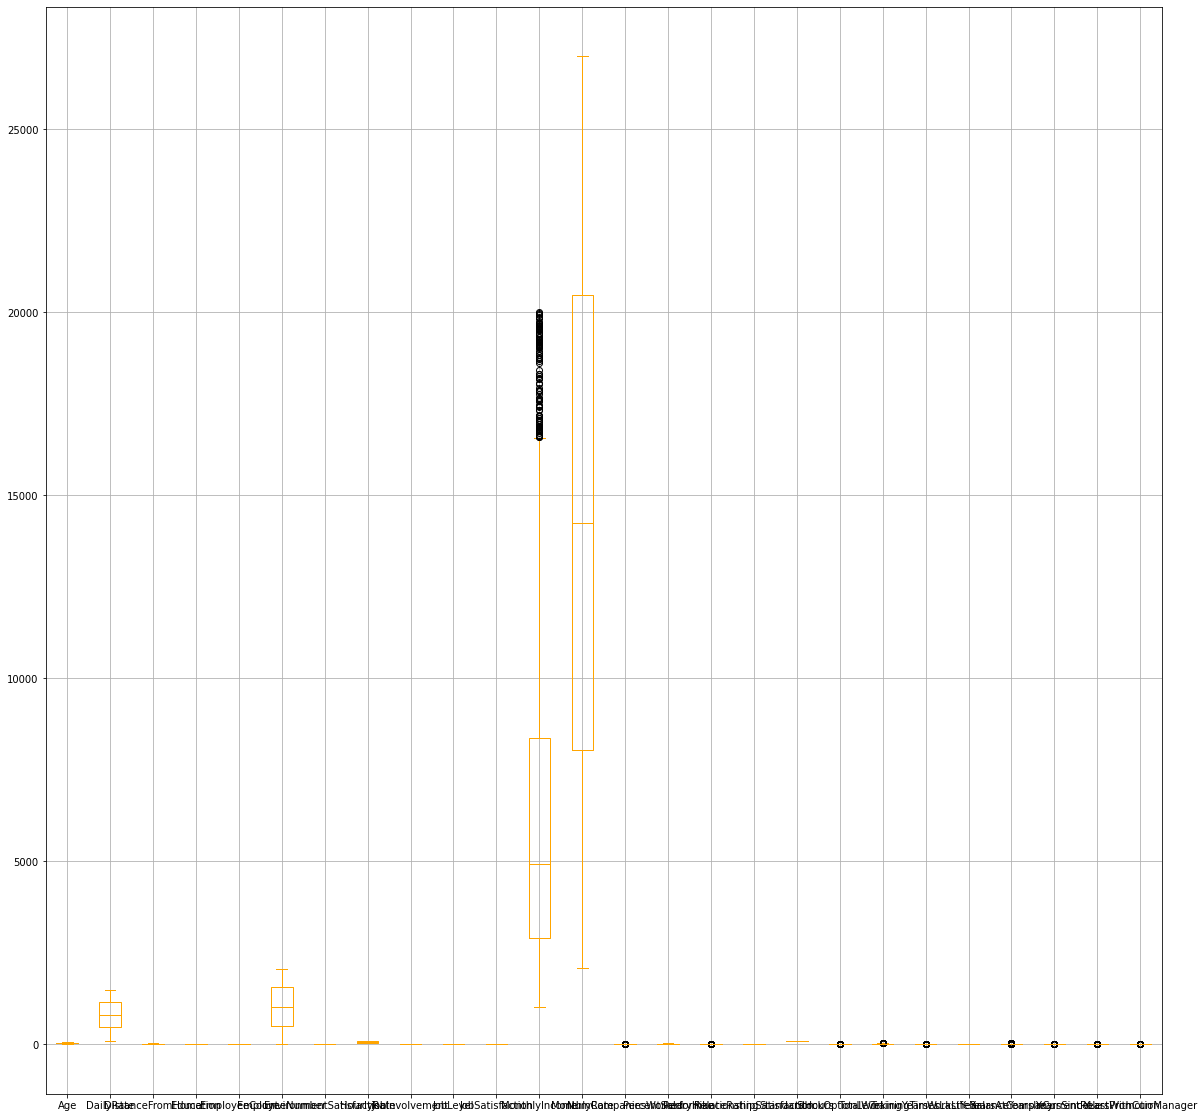

In [212]:
hr_data.boxplot(figsize=(20,20),color= 'orange')
plt.show()

## Bivariate analysis of Attrition(dependent variable) with other variables

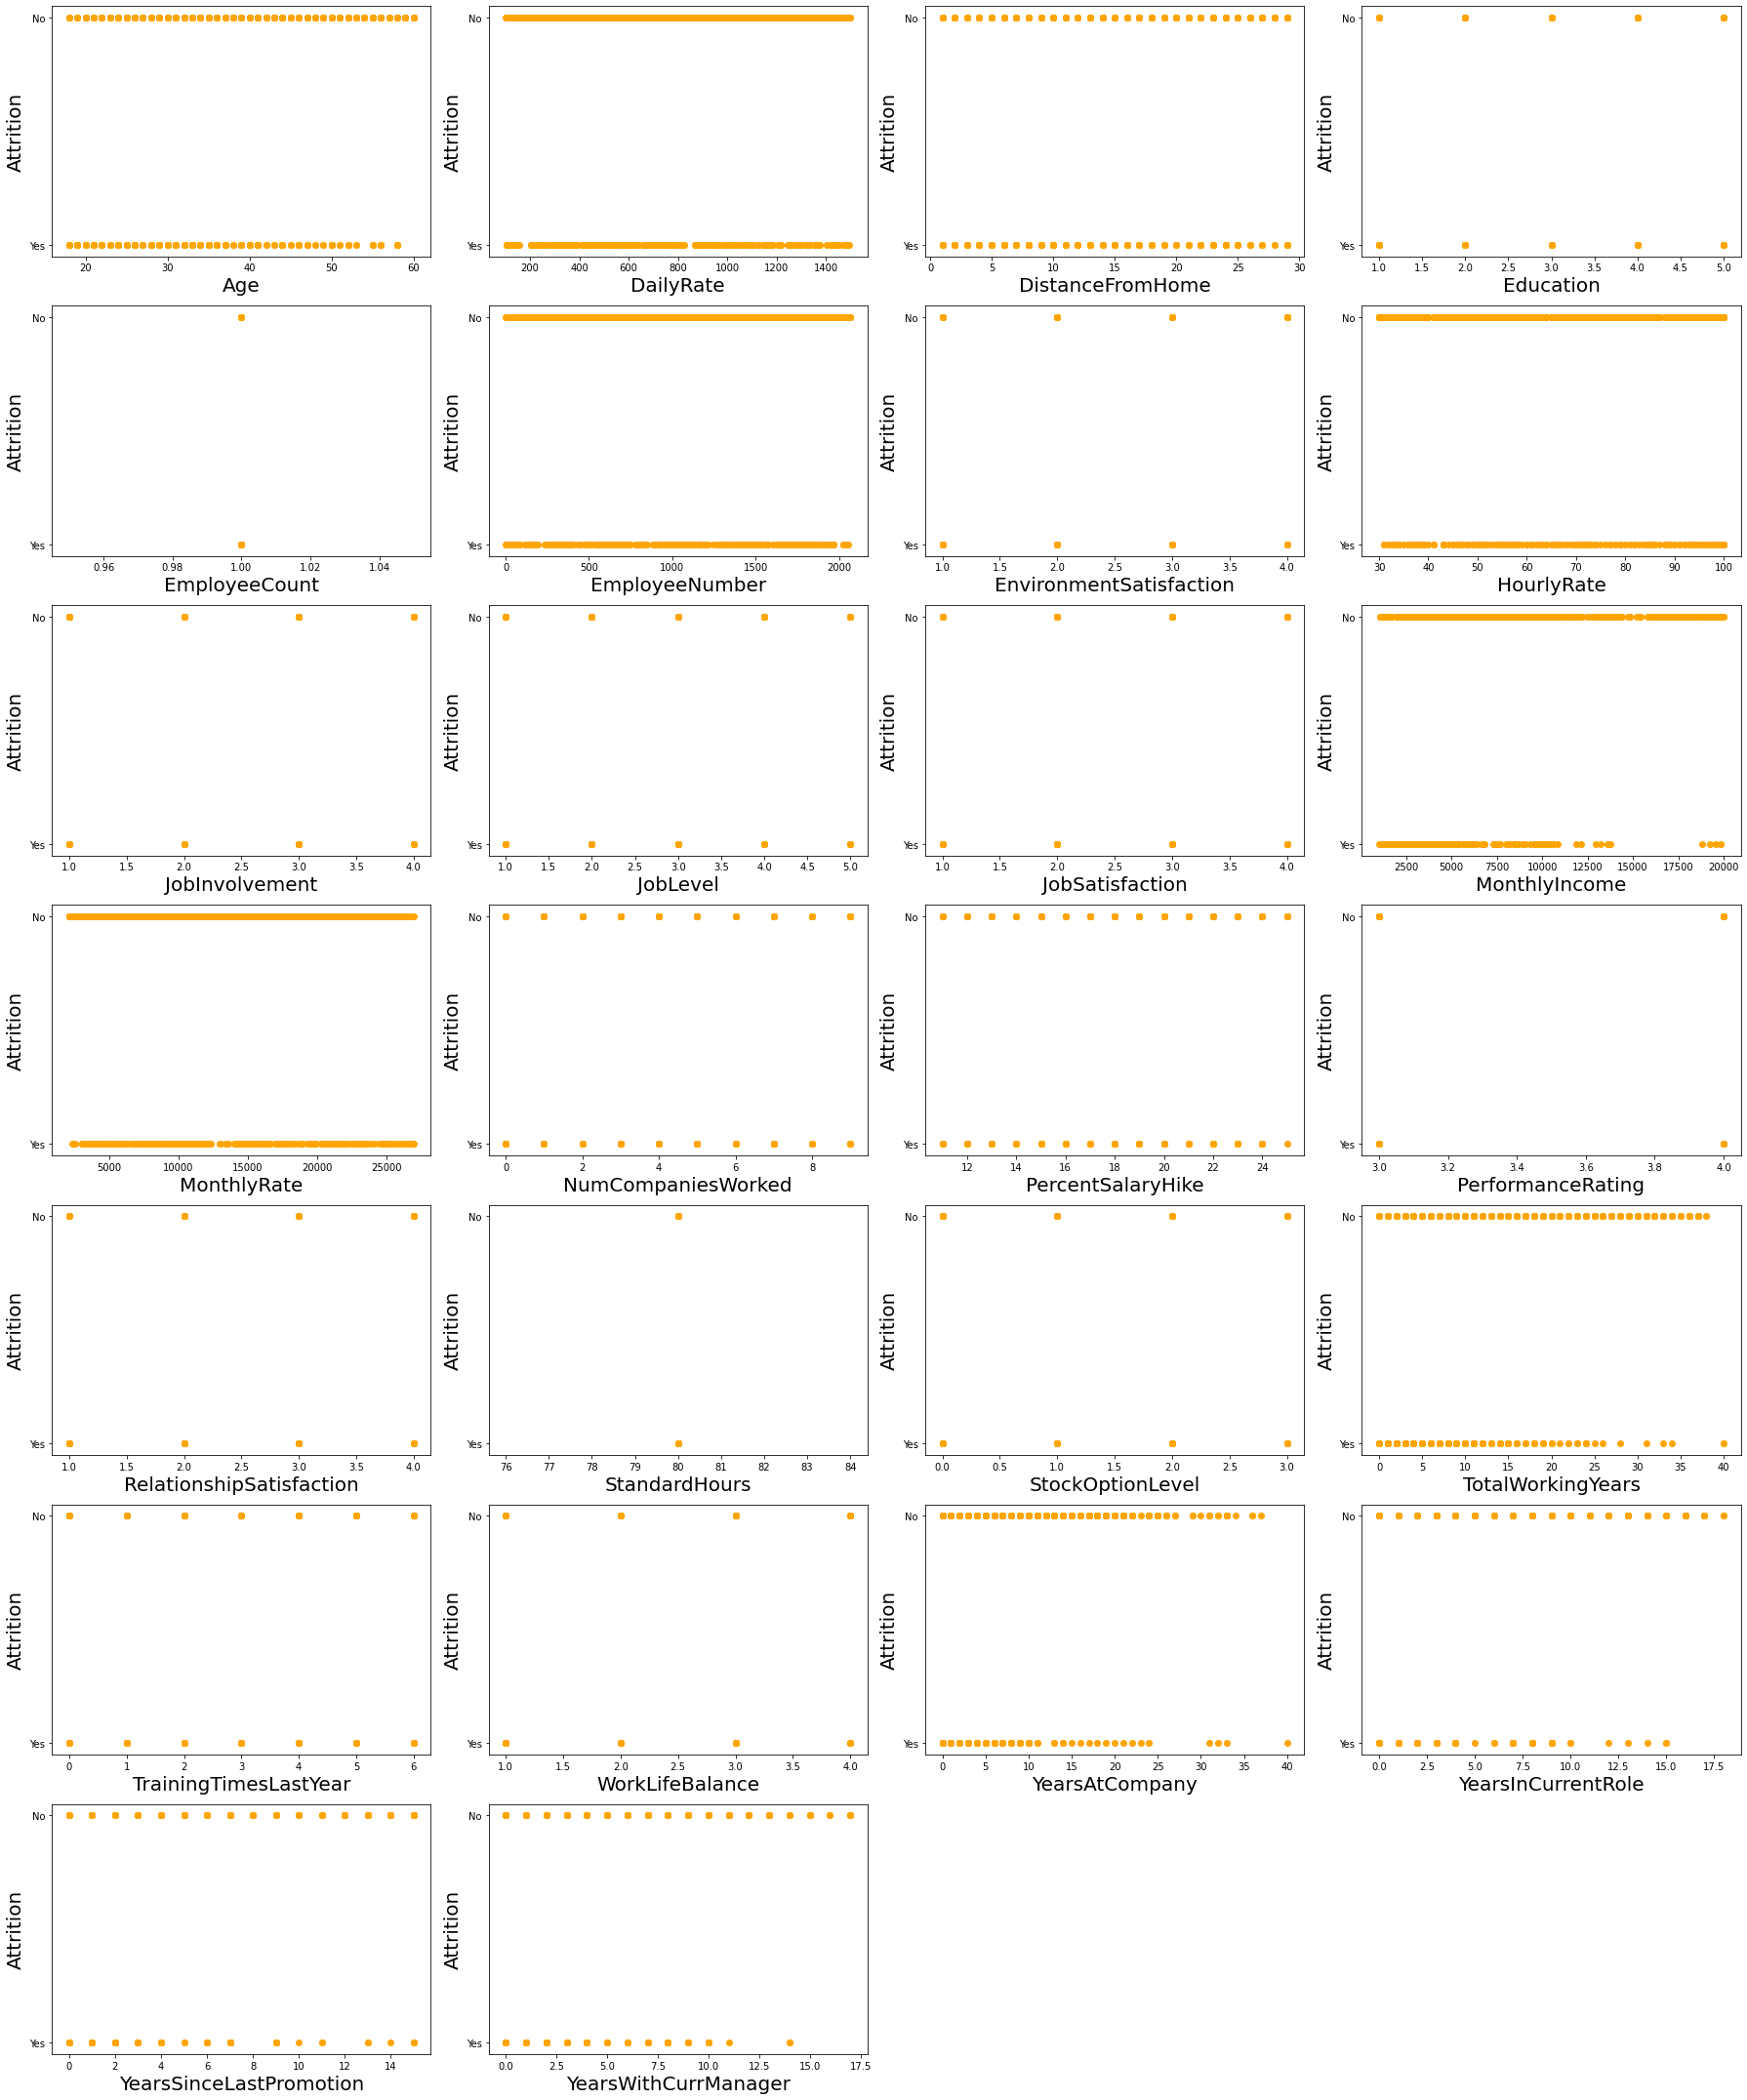

In [213]:
# scatter plot of Every Column Vs Attiration
plt.figure(figsize = (25,30))
plotnumber = 1

for col in hr_data.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis = 1):
    if plotnumber <=28:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(hr_data[col],hr_data['Attrition'], color='orange')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Attrition', fontsize=20)
    plotnumber += 1
plt.tight_layout()

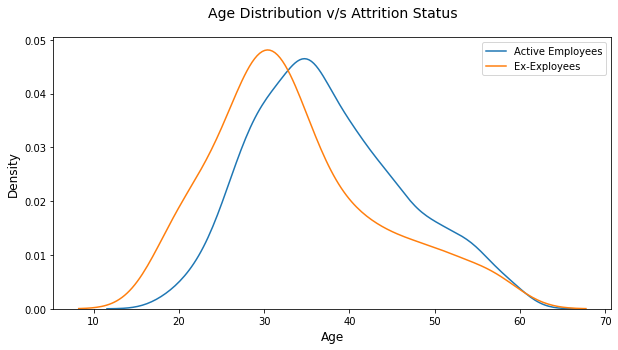

In [214]:
# kde plot  for age

plt.subplots(figsize=(10,5))

target_Yes = hr_data.loc[hr_data["Attrition"] == "No"]
target_No = hr_data.loc[hr_data["Attrition"] == "Yes"]

sns.distplot(target_Yes[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_No[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

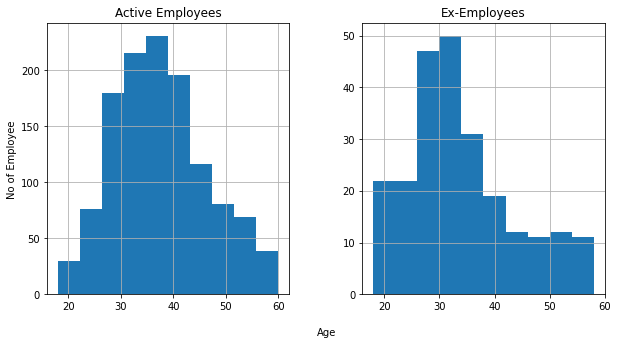

In [215]:
# plot histogram age
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,5)

target_Yes[['Age']].hist(bins=10, ax=axes[0])
axes[0].set_title('Active Employees')

target_No[['Age']].hist(bins=10, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("age_hist.png", bbox_inches="tight")
plt.show()

In [216]:
target_Yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


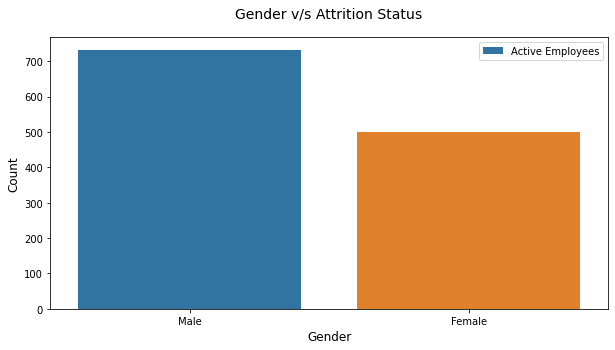

In [217]:
# Gender Plot
plt.subplots(figsize=(10,5))
sns.countplot(target_Yes['Gender'], label="Active Employees")
plt.legend()
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Gender v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

In [218]:
plt.subplots(figsize=(10,5))
sns.countplot(target_No['Gender'], label="Ex-Exployees")
plt.legend()
plt.xlabel('Gender', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title('Gender' v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

SyntaxError: ignored

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(target_Yes["MaritalStatus"], label="Active Employees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

In [ ]:
## MaritalStatus plot
plt.subplots(figsize=(10,5))
sns.countplot(target_No["MaritalStatus"], label="Ex-Exployees")
plt.legend()
plt.xlabel("MaritalStatus", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("MaritalStatus v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

In [ ]:
# kde plot  Distance from home

plt.subplots(figsize=(20,10))
sns.distplot(target_Yes[["DistanceFromHome"]], hist=False, label="Active Employees")
sns.distplot(target_No[["DistanceFromHome"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Distance", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("distance from home v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

In [ ]:
# plot histogram for Department
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,5)

target_Yes['Department'].hist(bins=10, ax=axes[0])
axes[0].set_title('Active Employees')

target_No['Department'].hist(bins=10, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Department')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

plt.show()

In [ ]:
# plot histogram
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(20,10)

target_Yes['JobRole'].hist(bins=20, ax=axes[0])
axes[1].set_title('Active Employees')

target_No['JobRole'].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'JobRole')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

plt.show()

In [ ]:

# kde plot 

plt.subplots(figsize=(20,10))
sns.distplot(target_Yes[["YearsAtCompany"]], hist=False, label="Active Employees")
sns.distplot(target_No[["YearsAtCompany"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("YearsAtCompany", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("YearsAtCompany v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

In [ ]:

# plot histogram
fig, axes = plt.subplots(2,1)
fig.set_size_inches(6,4)

target_Yes['OverTime'].hist(bins=30, ax=axes[0])
axes[1].set_title('Active Employees')

target_No['OverTime'].hist(bins=30, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'OverTime')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

plt.show()

In [ ]:
# plot histogram Work Life Balance
fig, axes = plt.subplots(2,1)
fig.set_size_inches(10,5)

target_Yes['WorkLifeBalance'].hist(bins=20, ax=axes[0])
axes[1].set_title('Active Employee')

target_No['WorkLifeBalance'].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'WorkLifeBalance')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

plt.show()


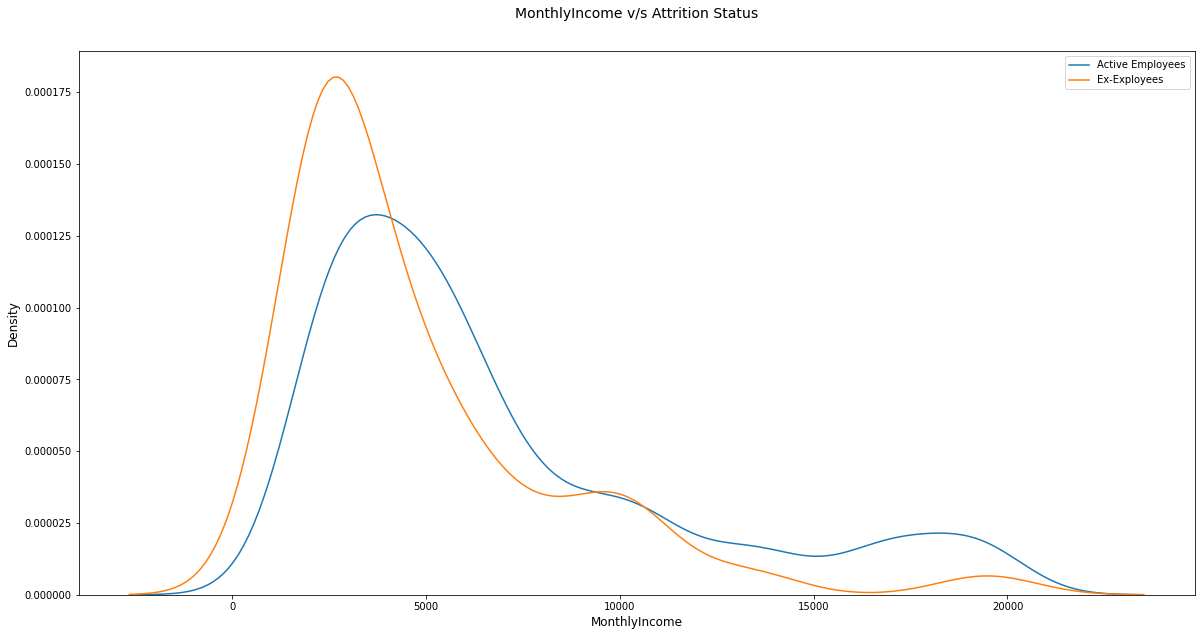

In [219]:

# kde plot 

plt.subplots(figsize=(20,10))
sns.distplot(target_Yes[["MonthlyIncome"]], hist=False, label="Active Employees")
sns.distplot(target_No[["MonthlyIncome"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("MonthlyIncome", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("MonthlyIncome v/s Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

plt.show()

## Heat map

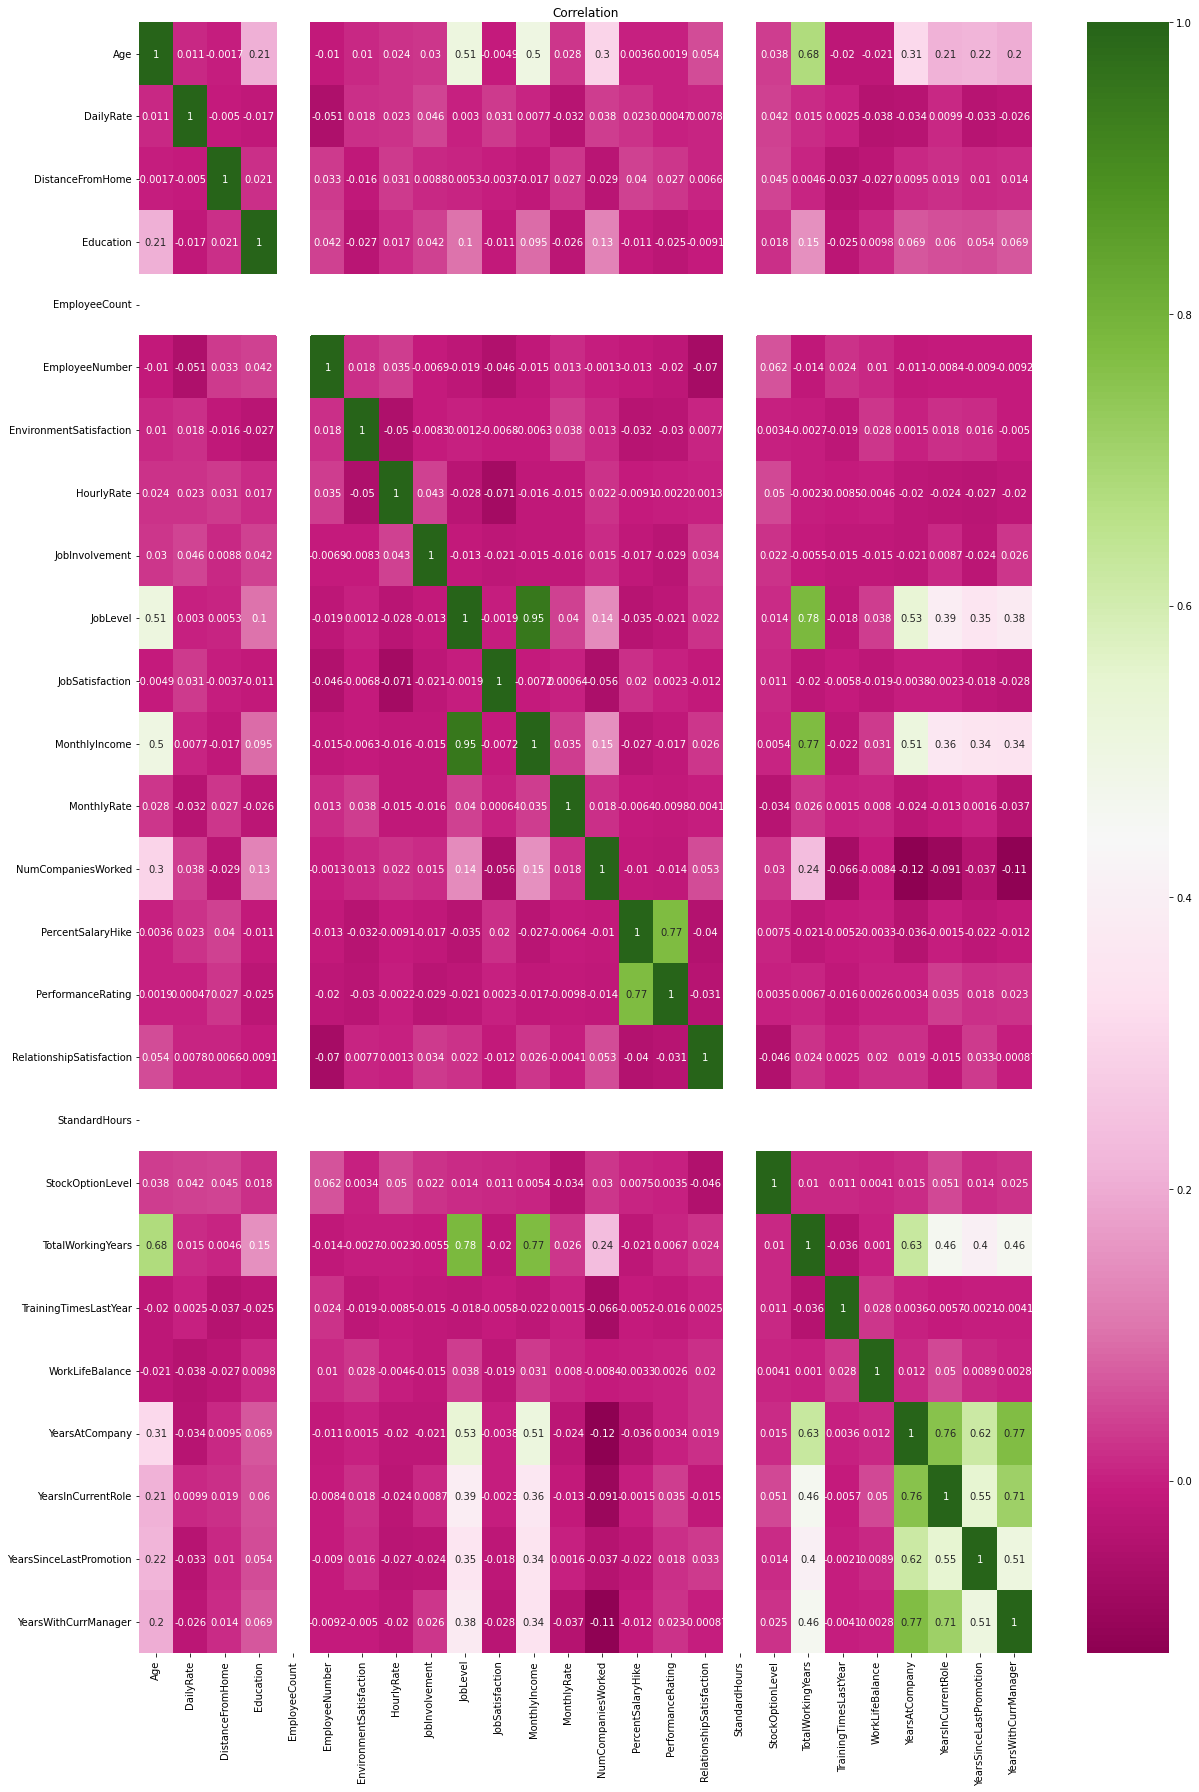

In [25]:
plt.figure(figsize = [20, 30])
sns.heatmap(hr_data.corr(),cmap="PiYG", annot = True)
plt.title('Correlation')
plt.show()

# Data Cleaning

In [26]:
#Checking for null values
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [37]:
hr_data.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
Age                         0.413286
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64

### No Skewness in the data

# Splitting  Dependent and Independent Variable

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [73]:
data=hr_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

                     feature        VIF
0                        Age   2.044997
1                  DailyRate   1.020863
2           DistanceFromHome   1.016514
3                  Education   1.061247
4              EmployeeCount   0.000000
5             EmployeeNumber   1.019558
6    EnvironmentSatisfaction   1.010565
7                 HourlyRate   1.019212
8             JobInvolvement   1.016367
9                   JobLevel  11.208731
10           JobSatisfaction   1.016416
11             MonthlyIncome  10.802169
12               MonthlyRate   1.012457
13        NumCompaniesWorked   1.257738
14         PercentSalaryHike   2.516413
15         PerformanceRating   2.514405
16  RelationshipSatisfaction   1.020376
17             StandardHours   0.000000
18          StockOptionLevel   1.021305
19         TotalWorkingYears   4.767805
20     TrainingTimesLastYear   1.010545
21           WorkLifeBalance   1.014959
22            YearsAtCompany   4.587405
23        YearsInCurrentRole   2.718616


# Removing Job levels as it has highest vif value


In [74]:
data=hr_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

                     feature       VIF
0                        Age  2.043271
1                  DailyRate  1.020685
2           DistanceFromHome  1.012143
3                  Education  1.061201
4              EmployeeCount  0.000000
5             EmployeeNumber  1.019225
6    EnvironmentSatisfaction  1.010174
7                 HourlyRate  1.017180
8             JobInvolvement  1.016361
9            JobSatisfaction  1.016048
10             MonthlyIncome  2.538925
11               MonthlyRate  1.011879
12        NumCompaniesWorked  1.257195
13         PercentSalaryHike  2.515624
14         PerformanceRating  2.514356
15  RelationshipSatisfaction  1.020232
16             StandardHours  0.000000
17          StockOptionLevel  1.020722
18         TotalWorkingYears  4.667624
19     TrainingTimesLastYear  1.010343
20           WorkLifeBalance  1.013574
21            YearsAtCompany  4.587121
22        YearsInCurrentRole  2.717277
23   YearsSinceLastPromotion  1.673903
24      YearsWithCurrMana

In [220]:
features = hr_data.drop(['Attrition','JobLevel','EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'],axis=1)
target = hr_data["Attrition"]

In [221]:
features = pd.get_dummies(features,drop_first=True)
features

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,5130,24907,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,3,2090,2396,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,2,3468,16632,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,4,2571,12290,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,1,9991,21457,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,6142,5174,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,5390,13243,...,0,0,0,0,0,1,0,1,0,0


In [222]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#  reate a label encoder object
le = LabelEncoder()
target=le.fit_transform(target)
target

array([1, 0, 1, ..., 0, 0, 0])

In [223]:
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(features), columns=features.columns)

In [224]:
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score


# Logistic Regression

In [225]:
# model building and evaluation
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
for j in test_size:
  for i in range(100):
      x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)
      model=LogisticRegression(solver="liblinear", random_state=1)
      model.fit(x_train,y_train)
      pred= model.predict(x_test)
      acc=accuracy_score(y_test,pred)
      check=model.predict(x_train)
      check_acc=accuracy_score(y_train,check)
          
      if acc>Maximum_Accuracy:
        Maximum_Accuracy=acc
        print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)


Test set accuracy 0.8843537414965986 Train set accuracy 0.8945578231292517 Random state 0 test_size 0.2
Test set accuracy 0.8979591836734694 Train set accuracy 0.8945578231292517 Random state 3 test_size 0.2
Test set accuracy 0.9013605442176871 Train set accuracy 0.8869047619047619 Random state 4 test_size 0.2
Test set accuracy 0.9285714285714286 Train set accuracy 0.8843537414965986 Random state 26 test_size 0.2


In [233]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                          random_state=26)
model_log=LogisticRegression(solver="liblinear", random_state=1)
model_log.fit(x_train,y_train)
pred_log= model_log.predict(x_test)
acc=accuracy_score(y_test,pred_log)
    
kfold = KFold(n_splits=10)  
acc_=[]
auc_=[]
acc_mean=[]
acc_std=[]
auc_mean=[]
auc_std=[]
  
    # accuracy scoring
acc_results = cross_val_score(model_log, x_train,y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
auc_results = cross_val_score(model_log, x_train,y_train, cv=kfold, scoring="roc_auc")

acc_.append(acc_results)
auc_.append(auc_results)
auc_mean.append( round(auc_results.mean()*100, 2))
auc_std.append(round(auc_results.std()*100, 2))
acc_mean.append(round(acc_results.mean()*100, 2))
acc_std.append(round(acc_results.std()*100, 2))

#Auc-Roc Curve


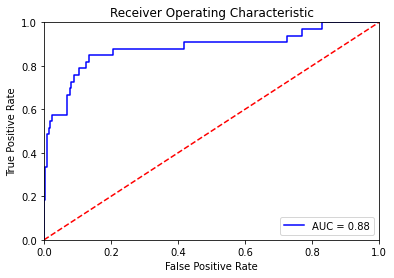

In [234]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_log.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest



In [232]:
# model building and evaluation
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
for j in test_size:
  for i in range(100):
      x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)
      model=RandomForestClassifier(n_estimators=100, random_state=1)
      model.fit(x_train,y_train)
      pred= model.predict(x_test)
      acc=accuracy_score(y_test,pred)
      check=model.predict(x_train)
      check_acc=accuracy_score(y_train,check)
          
      if acc>Maximum_Accuracy:
        Maximum_Accuracy=acc
        print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

Test set accuracy 0.8469387755102041 Train set accuracy 1.0 Random state 0 test_size 0.2
Test set accuracy 0.8673469387755102 Train set accuracy 1.0 Random state 2 test_size 0.2
Test set accuracy 0.8707482993197279 Train set accuracy 1.0 Random state 3 test_size 0.2
Test set accuracy 0.8741496598639455 Train set accuracy 1.0 Random state 4 test_size 0.2
Test set accuracy 0.8775510204081632 Train set accuracy 1.0 Random state 8 test_size 0.2
Test set accuracy 0.8877551020408163 Train set accuracy 1.0 Random state 14 test_size 0.2
Test set accuracy 0.9183673469387755 Train set accuracy 1.0 Random state 26 test_size 0.2


KeyboardInterrupt: ignored

In [235]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                          random_state=26)
model_rf=RandomForestClassifier(n_estimators=100, random_state=1)
model_rf.fit(x_train,y_train)
pred_rf= model_rf.predict(x_test)
acc_rf=accuracy_score(y_test,pred_rf)
    
kfold = KFold(n_splits=10)  
    # accuracy scoring
acc_results = cross_val_score(model_rf, x_train,y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
auc_results = cross_val_score(model_rf, x_train,y_train, cv=kfold, scoring="roc_auc")

acc_.append(acc_results)
auc_.append(auc_results)
auc_mean.append( round(auc_results.mean()*100, 2))
auc_std.append(round(auc_results.std()*100, 2))
acc_mean.append(round(acc_results.mean()*100, 2))
acc_std.append(round(acc_results.std()*100, 2))

Auc_roc_curve

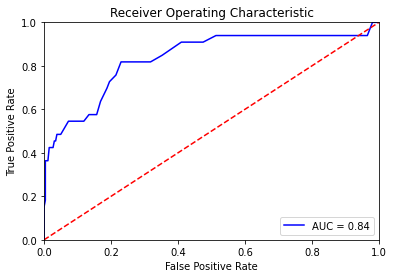

In [236]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Adaboost

In [148]:
# model building and evaluation
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
for j in test_size:
  for i in range(100):
      x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)
      model=AdaBoostClassifier(random_state=1)
      model.fit(x_train,y_train)
      pred= model.predict(x_test)
      acc=accuracy_score(y_test,pred)
      check=model.predict(x_train)
      check_acc=accuracy_score(y_train,check)
          
      if acc>Maximum_Accuracy:
        Maximum_Accuracy=acc
        print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

Test set accuracy 0.8605442176870748 Train set accuracy 0.9090136054421769 Random state 0 test_size 0.2
Test set accuracy 0.8741496598639455 Train set accuracy 0.9047619047619048 Random state 2 test_size 0.2
Test set accuracy 0.8877551020408163 Train set accuracy 0.8962585034013606 Random state 5 test_size 0.2
Test set accuracy 0.8945578231292517 Train set accuracy 0.9030612244897959 Random state 12 test_size 0.2
Test set accuracy 0.9013605442176871 Train set accuracy 0.9064625850340136 Random state 26 test_size 0.2
Test set accuracy 0.9081632653061225 Train set accuracy 0.9005102040816326 Random state 56 test_size 0.2


In [237]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                          random_state=56)
model_ada=AdaBoostClassifier(random_state=1)
model_ada.fit(x_train,y_train)
pred_ada= model_ada.predict(x_test)
acc_ada=accuracy_score(y_test,pred_ada)
    
kfold = KFold(n_splits=10)  
    # accuracy scoring
acc_results = cross_val_score(model_ada, x_train,y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
auc_results = cross_val_score(model_ada, x_train,y_train, cv=kfold, scoring="roc_auc")

acc_.append(acc_results)
auc_.append(auc_results)
auc_mean.append( round(auc_results.mean()*100, 2))
auc_std.append(round(auc_results.std()*100, 2))
acc_mean.append(round(acc_results.mean()*100, 2))
acc_std.append(round(acc_results.std()*100, 2))

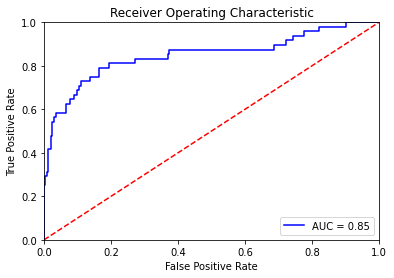

In [238]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_ada.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Support Vector Machine

In [151]:
# model building and evaluation
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
for j in test_size:
  for i in range(100):
      x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)
      model= SVC(gamma="auto", random_state=1)
      model.fit(x_train,y_train)
      pred= model.predict(x_test)
      acc=accuracy_score(y_test,pred)
      check=model.predict(x_train)
      check_acc=accuracy_score(y_train,check)
          
      if acc>Maximum_Accuracy:
        Maximum_Accuracy=acc
        print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

Test set accuracy 0.8673469387755102 Train set accuracy 0.9166666666666666 Random state 0 test_size 0.2
Test set accuracy 0.8843537414965986 Train set accuracy 0.9132653061224489 Random state 3 test_size 0.2
Test set accuracy 0.8877551020408163 Train set accuracy 0.91921768707483 Random state 14 test_size 0.2
Test set accuracy 0.9149659863945578 Train set accuracy 0.9115646258503401 Random state 26 test_size 0.2


In [239]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                          random_state=56)
model_svm=SVC(gamma="auto", random_state=1)
model_svm.fit(x_train,y_train)
pred_svm= model_ada.predict(x_test)
acc_svm=accuracy_score(y_test,pred_svm)
    
kfold = KFold(n_splits=10)  
    # accuracy scoring
acc_results = cross_val_score(model_svm, x_train,y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
auc_results = cross_val_score(model_svm, x_train,y_train, cv=kfold, scoring="roc_auc")

acc_.append(acc_results)
auc_.append(auc_results)
auc_mean.append( round(auc_results.mean()*100, 2))
auc_std.append(round(auc_results.std()*100, 2))
acc_mean.append(round(acc_results.mean()*100, 2))
acc_std.append(round(acc_results.std()*100, 2))

## no auc - roc curve possible for Svm Model

XGBClassifier

In [153]:
# model building and evaluation
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
for j in test_size:
  for i in range(100):
      x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)
      model= XGBClassifier(random_state=1)
      model.fit(x_train,y_train)
      pred= model.predict(x_test)
      acc=accuracy_score(y_test,pred)
      check=model.predict(x_train)
      check_acc=accuracy_score(y_train,check)
          
      if acc>Maximum_Accuracy:
        Maximum_Accuracy=acc
        print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

Test set accuracy 0.8605442176870748 Train set accuracy 0.9472789115646258 Random state 0 test_size 0.2
Test set accuracy 0.8639455782312925 Train set accuracy 0.9472789115646258 Random state 2 test_size 0.2
Test set accuracy 0.8707482993197279 Train set accuracy 0.9430272108843537 Random state 3 test_size 0.2
Test set accuracy 0.891156462585034 Train set accuracy 0.9455782312925171 Random state 5 test_size 0.2
Test set accuracy 0.9183673469387755 Train set accuracy 0.9387755102040817 Random state 26 test_size 0.2


In [240]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                          random_state=26)
model_xgb=XGBClassifier(random_state=1)
model_xgb.fit(x_train,y_train)
pred_xgb= model_xgb.predict(x_test)
acc_xgb=accuracy_score(y_test,pred_svm)
    
kfold = KFold(n_splits=10)  
    # accuracy scoring
acc_results = cross_val_score(model_xgb, x_train,y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
auc_results = cross_val_score(model_xgb, x_train,y_train, cv=kfold, scoring="roc_auc")

acc_.append(acc_results)
auc_.append(auc_results)
auc_mean.append( round(auc_results.mean()*100, 2))
auc_std.append(round(auc_results.std()*100, 2))
acc_mean.append(round(acc_results.mean()*100, 2))
acc_std.append(round(acc_results.std()*100, 2))

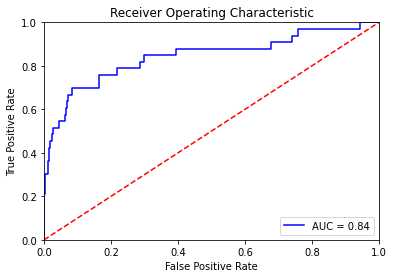

In [241]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_xgb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KNeighborsClassifier

In [156]:
#model building and evaluation
Maximum_Accuracy=0

test_size=[0.2,0.25,0.3]
for j in test_size:
  for i in range(100):
      x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)
      model= KNeighborsClassifier()
      model.fit(x_train,y_train)
      pred= model.predict(x_test)
      acc=accuracy_score(y_test,pred)
      check=model.predict(x_train)
      check_acc=accuracy_score(y_train,check)
          
      if acc>Maximum_Accuracy:
        Maximum_Accuracy=acc
        print("Test set accuracy",Maximum_Accuracy,"Train set accuracy",check_acc,'Random state',i,'test_size',j)

Test set accuracy 0.8571428571428571 Train set accuracy 0.8775510204081632 Random state 0 test_size 0.2
Test set accuracy 0.8741496598639455 Train set accuracy 0.8681972789115646 Random state 3 test_size 0.2
Test set accuracy 0.8809523809523809 Train set accuracy 0.8698979591836735 Random state 15 test_size 0.2
Test set accuracy 0.891156462585034 Train set accuracy 0.8690476190476191 Random state 26 test_size 0.2
Test set accuracy 0.8979591836734694 Train set accuracy 0.8698979591836735 Random state 55 test_size 0.2


In [242]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,
                                                          random_state=55)
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
pred_knn= model_knn.predict(x_test)
acc_knn=accuracy_score(y_test,pred_svm)
    
kfold = KFold(n_splits=10)  
    # accuracy scoring
acc_results = cross_val_score(model_knn, x_train,y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
auc_results = cross_val_score(model_knn, x_train,y_train, cv=kfold, scoring="roc_auc")

acc_.append(acc_results)
auc_.append(auc_results)
auc_mean.append( round(auc_results.mean()*100, 2))
auc_std.append(round(auc_results.std()*100, 2))
acc_mean.append(round(acc_results.mean()*100, 2))
acc_std.append(round(acc_results.std()*100, 2))

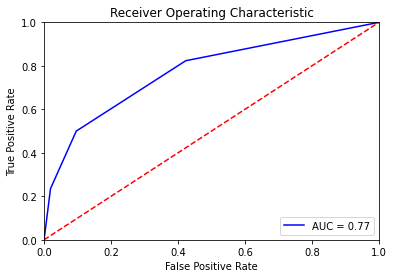

In [243]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
data = list(zip(auc_mean,auc_std,acc_mean,acc_std))                                      
df=pd.DataFrame(data,columns=["Auc_mean","Auc_Std",'Acc_Mean','Acc_Std)'])   
df['Algorithm']=0
df


,Auc_mean,Auc_Std,Acc_Mean,Acc_Std),Algorithm
0,81.98,5.09,86.22,2.26,0
1,79.29,6.89,84.69,2.72,0
2,82.14,6.80,86.40,2.54,0
3,82.04,5.92,85.80,2.29,0
4,78.37,6.78,86.14,2.56,0
5,65.82,5.62,82.83,3.30,0


In [244]:
list1=['Logistic','Random Forest','Ada Boost','Svm','Xgb Boost','Knn Algorithm']
for i in range(6):
  df['Algorithm'][i]=list1[i]

df

,Auc_mean,Auc_Std,Acc_Mean,Acc_Std),Algorithm
0,81.98,5.09,86.22,2.26,Logistic
1,79.29,6.89,84.69,2.72,Random Forest
2,82.14,6.80,86.40,2.54,Ada Boost
3,82.04,5.92,85.80,2.29,Svm
4,78.37,6.78,86.14,2.56,Xgb Boost
5,65.82,5.62,82.83,3.30,Knn Algorithm


# We will do some hyper-tunning on best Models

In [245]:
kfold = KFold(n_splits=10)
model = LogisticRegression(solver='liblinear', random_state=0)
scoring = 'roc_auc'
results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.7655914  0.8394822  0.85111111 0.83809524 0.89702517 0.82666667
 0.75644841 0.90352941 0.8640873  0.81882353] 

Average AUC score = 0.8361; standard deviation = 0.0458


In [246]:
%%time
param_grid = {"C": np.arange(1e-01, 1.01, 0.1), "class_weight": ["balanced", None]} 

log_model = GridSearchCV(LogisticRegression(solver="liblinear", 
                                         random_state=0),
                                         return_train_score=True,
                                         param_grid=param_grid,
                                         scoring="roc_auc",
                                         cv=10)

log_model.fit(x_train, y_train)

print("best estimator: " + str(log_model.best_estimator_))
print("best params: " + str(log_model.best_params_))
print("best score:", log_model.best_score_)


best estimator: LogisticRegression(C=0.6, random_state=0, solver='liblinear')
best params: {'C': 0.6, 'class_weight': None}
best score: 0.836377375692545
CPU times: user 6.82 s, sys: 5.47 s, total: 12.3 s
Wall time: 6.38 s


In [247]:
# make predictions
pred = log_model.predict(x_test)
# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred)
print('Accuracy of Logistic Regression Classifier: {:.2f}%'.format(logit_accuracy*100))

Accuracy of Logistic Regression Classifier: 89.80%


In [248]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       260
           1       0.57      0.50      0.53        34

    accuracy                           0.90       294
   macro avg       0.75      0.72      0.74       294
weighted avg       0.89      0.90      0.90       294



In [249]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
pred_prob = log_model.predict_proba(x_test)[:, 1]
logit_roc_auc = roc_auc_score(y_test,pred_prob)

print("AUC on Test set: {}".format(logit_roc_auc))

AUC on Test set: 0.8311085972850678


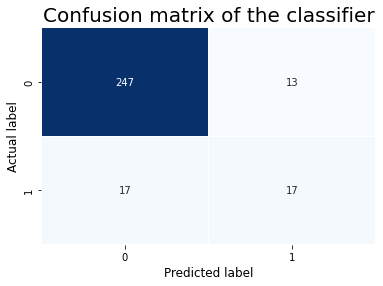

In [250]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

Random Forest Classifier

In [251]:
%%time
rf = RandomForestClassifier(random_state=0)

param_grid = {"n_estimators": [150, 200, 250],
              "min_samples_split":[2,4,6],
              "min_samples_leaf": [1, 2],
              "class_weight": ["balanced", None]}

grid_rf = GridSearchCV(rf,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

grid_fit = grid_rf.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_


print("best estimator: " + str(grid_rf.best_estimator_))
print("best params: " + str(grid_rf.best_params_))
print("best score:", grid_rf.best_score_)


best estimator: RandomForestClassifier(min_samples_split=4, n_estimators=150, random_state=0)
best params: {'class_weight': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
best score: 0.8217480187951469
CPU times: user 3min 7s, sys: 934 ms, total: 3min 8s
Wall time: 3min 8s


In [252]:
# make predictions
pred_rf = grid_rf.predict(x_test)
# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))
#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_rf)
print(report)

Accuracy of Random Forest Classifier: 88.78%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       260
           1       0.67      0.06      0.11        34

    accuracy                           0.89       294
   macro avg       0.78      0.53      0.52       294
weighted avg       0.86      0.89      0.84       294



In [253]:
y_pred_prob = grid_rf.predict_proba(x_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)

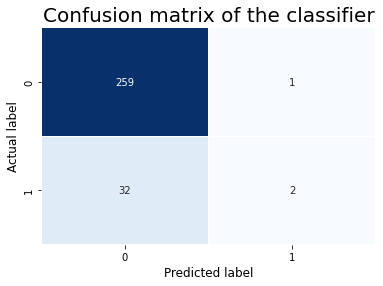

In [254]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

Reject as the cases of false positive is higher than logistic regression

XGB Classifier

In [255]:
%%time
xgb_classifier = XGBClassifier(random_state=0)

param_grid = {"n_estimators": [100, 150, 200],
              "max_depth": [2, 3, 4],
              "learning_rate":[0.01, 0.1],
              "gamma": [1,2,3]}

xgb_clf = GridSearchCV(xgb_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

xgb_clf.fit(x_train, y_train)

print("="*20)
print("best estimator: " + str(xgb_clf.best_estimator_))
print("best params: " + str(xgb_clf.best_params_))
print("best score:", xgb_clf.best_score_)
print("="*20)

best estimator: XGBClassifier(gamma=1, max_depth=2)
best params: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
best score: 0.8108082614489094
CPU times: user 2min 1s, sys: 792 ms, total: 2min 2s
Wall time: 2min 2s


In [256]:
# make predictions
pred_xgb = xgb_clf.predict(x_test)
# calculate accuracy score
logit_accuracy = accuracy_score(y_test, pred_xgb)
print('Accuracy of Random Forest Classifier: {:.2f}%'.format(logit_accuracy*100))
#classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred_xgb)
print(report)

Accuracy of Random Forest Classifier: 89.12%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       260
           1       0.56      0.26      0.36        34

    accuracy                           0.89       294
   macro avg       0.74      0.62      0.65       294
weighted avg       0.87      0.89      0.87       294



In [257]:
y_pred_prob = xgb_clf.predict_proba(x_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)

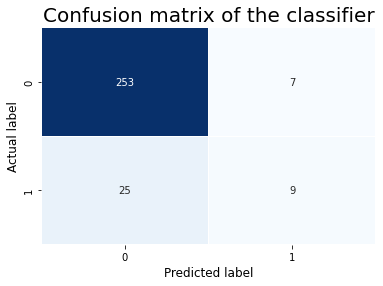

In [258]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, linewidths=0.1,cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=20)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

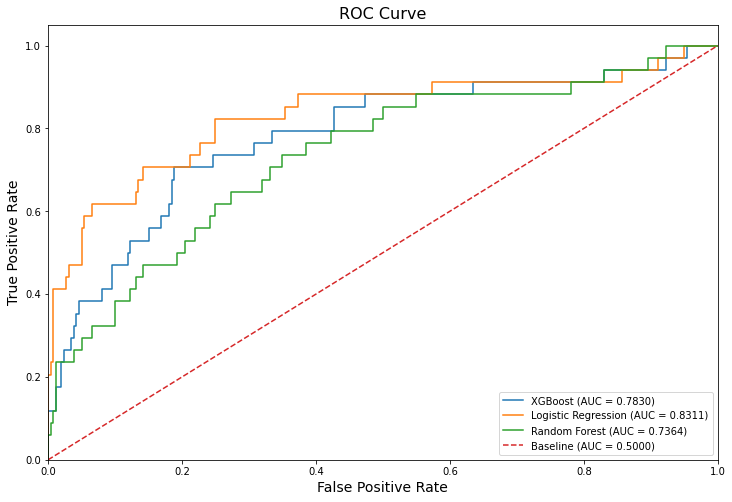

In [259]:
# create ROC curves
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_clf.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_rf.predict_proba(x_test)[:,1])
plt.figure(figsize=(12, 8))

# plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label="XGBoost (AUC = {:1.4f})".format(xgb_roc_auc))
# plot Logistic Regression ROC
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:1.4f})".format(logit_roc_auc))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
# plt.savefig("roc.png", bbox_inches="tight")
plt.show()

In [260]:
import pickle
# # saved the trained model in file with given name
pickle_out = open("AvacadoCaseStudy_classification.pkl","wb") # name of my pickle file , wb -write
pickle.dump(log_model, pickle_out)
pickle_out.close()

In [261]:

# loading the pickeled model
pickle_in = open("AvacadoCaseStudy_classification.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
Predicted,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
## Done with the Hr Analytics Dataset